I want to make a lot of plots of just diverent observation paramiters for the data.

In [1]:
from astropy.table import Table, Column
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G, sigma_sb, c
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run Binary_Data_Clean2.py
Tables = Binary_Data_Clean2('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)



In [3]:
len(AllAvg)

1372

In [4]:
AAS_RG = Tables.rg_cut(AllAvg)
len(AAS_RG),type(AAS_RG)

(1276, astropy.io.fits.fitsrec.FITS_rec)

(array([4.95903e+05, 7.91877e+05, 1.81961e+05, 2.10050e+04, 1.58100e+04,
        2.29000e+02, 1.51000e+02, 8.20000e+01, 4.80000e+01, 1.80000e+01]),
 array([3.35430002, 3.53568001, 3.71705999, 3.89843998, 4.07981997,
        4.26119995, 4.44257994, 4.62395992, 4.80533991, 4.98671989,
        5.16809988]),
 <a list of 10 Patch objects>)

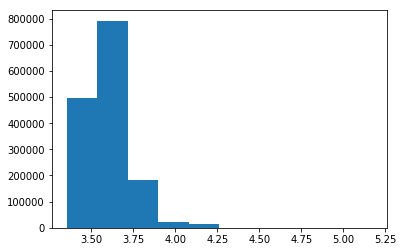

In [5]:
plt.hist(ISO['LOGTE'])

In [6]:
AAS_RG_ISO = Tables.iso_fit(AAS_RG, ISO)
AAS_RV = Tables.rv_table_add(AAS_RG_ISO, AllVis)
AllAvg_LMC_5 = Tables.mc_cut(AAS_RV, 'L')
AllAvg_SMC_5 = Tables.mc_cut(AAS_RV, 'S')

In [7]:
mean_vis_LMC = np.mean(AllAvg_LMC_5['NVISITS'])
mean_vis_SMC = np.mean(AllAvg_SMC_5['NVISITS'])
print('mean NVISITS for LMC Sample', mean_vis_LMC, '\n Mean NVISITS for SMC sample', mean_vis_SMC)
print('Number of stars in the LMC {}, SMC {}.'.format(len(AllAvg_LMC_5),len(AllAvg_SMC_5)))

mean NVISITS for LMC Sample 7.277942631058358 
 Mean NVISITS for SMC sample 6.091633466135458
Number of stars in the LMC 1011, SMC 251.


Made a cut to SNR, got rid of any observations with and SNR < 5. This will cause the number of data points to be different from 'NVISITS' in the allMC.avg. table because that kept low SNR measuments in it's calculations. 

In [8]:
AllVis_LMC = Tables.mc_cut(AllVis, 'L')
AllVis_SMC = Tables.mc_cut(AllVis, 'S')

In [10]:
AllAvg_LMC_5

RADIALV,RADIAL_ERR,RADIAL_DATE,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE_TARGET3,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,TARGFLAGS,SURVEY,NINST [3],NVISITS,COMBTYPE,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,OBSVHELIO_AVG,OBSVSCATTER,OBSVERR,OBSVERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],MEANFIB,SIGFIB,SNREV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,EXTRATARG,MIN_H,MAX_H,MIN_JK,MAX_JK,PARAM [9],FPARAM [9],"PARAM_COV [9,9]","FPARAM_COV [9,9]",TEFF,TEFF_ERR,LOGG,LOGG_ERR,VMICRO,VMACRO,VSINI,M_H,M_H_ERR,ALPHA_M,ALPHA_M_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [9],FELEM [26],FELEM_ERR [26],X_H [26],X_H_ERR [26],X_M [26],X_M_ERR [26],C_FE,CI_FE,N_FE,O_FE,NA_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,FE_H,CO_FE,NI_FE,CU_FE,GE_FE,RB_FE,Y_FE,ND_FE,C_FE_ERR,CI_FE_ERR,N_FE_ERR,O_FE_ERR,NA_FE_ERR,MG_FE_ERR,AL_FE_ERR,SI_FE_ERR,P_FE_ERR,S_FE_ERR,K_FE_ERR,CA_FE_ERR,TI_FE_ERR,TIII_FE_ERR,V_FE_ERR,CR_FE_ERR,MN_FE_ERR,FE_H_ERR,CO_FE_ERR,NI_FE_ERR,CU_FE_ERR,GE_FE_ERR,RB_FE_ERR,Y_FE_ERR,ND_FE_ERR,C_FE_FLAG,CI_FE_FLAG,N_FE_FLAG,O_FE_FLAG,NA_FE_FLAG,MG_FE_FLAG,AL_FE_FLAG,SI_FE_FLAG,P_FE_FLAG,S_FE_FLAG,K_FE_FLAG,CA_FE_FLAG,TI_FE_FLAG,TIII_FE_FLAG,V_FE_FLAG,CR_FE_FLAG,MN_FE_FLAG,FE_H_FLAG,CO_FE_FLAG,NI_FE_FLAG,CU_FE_FLAG,GE_FE_FLAG,RB_FE_FLAG,Y_FE_FLAG,ND_FE_FLAG,ELEM_CHI2 [26],ELEMFLAG [26],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,AK_TARG,AK_TARG_METHOD,AK_WISE,SFD_EBV,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [50],VISIT_PK [50],"FPARAM_CLASS [23,9]",CHI2_CLASS [23],LMCPA,LMCRAD,SMCPA,SMCRAD,MLON,MLAT,M,MERR,DDO51ERR,T2,T2ERR,DELTA_VHELIO,DELTA_PMRA,DELTA_PMDEC,DELTA_FEH,DELTA_ALPHA,TARGET_TYPE,TARGET_NAME,PRIORITY,GAIA_SOURCEID,GAIA_PARALLAX,GAIA_PARALLAX_ERROR,GAIA_DIST05,GAIA_DIST_MODE,GAIA_DIST95,GAIA_PMRA,GAIA_PMRA_ERROR,GAIA_PMDEC,GAIA_PMDEC_ERROR,GAIA_GMAG,GAIA_BPMAG,GAIA_RPMAG,GAIA_PML,GAIA_PMB,GAIA_PMML,GAIA_PMMB,ISO_MEANM,ISO_MEDIANM,ISO_STDM,ISO_MEANL,ISO_MEDIANL,ISO_STDL,ISO_MEANR
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,solMass,solMass,solMass,solLum,solLum,solLum,solRad
str111,str111,str141,str47,str36,str59,str38,str18,str8,int32,str5,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,str192,str35,int32,int32,int32,int16,float32,int32,str165,int32,str58,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,str7,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,int32,str189,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32

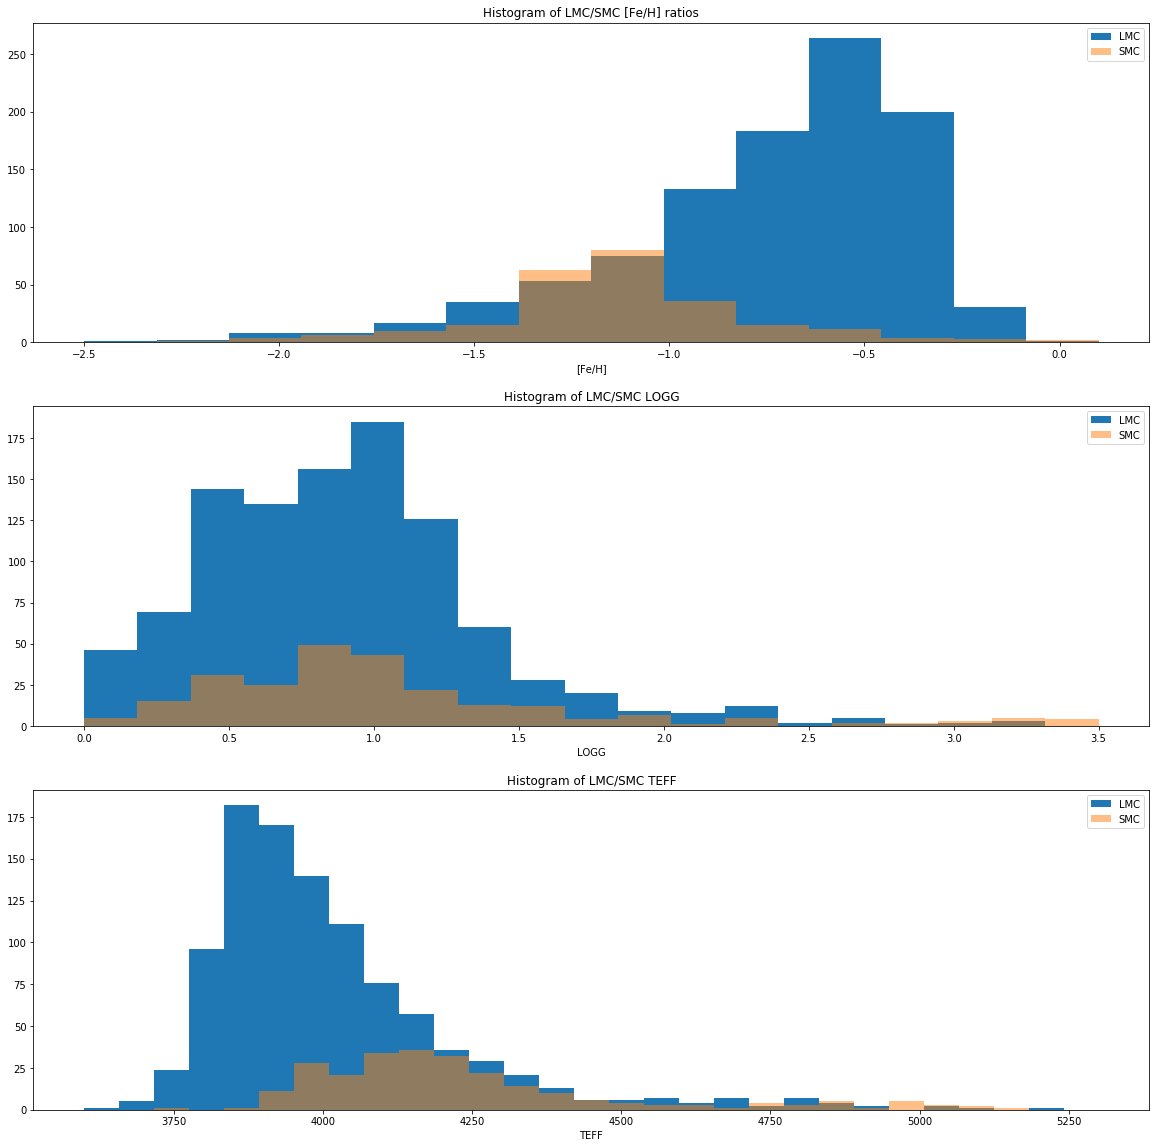

In [21]:
fig, (ax1,ax2, ax3) = plt.subplots(3,1,figsize = (20,20))
ax1.hist(AllAvg_LMC_5['FE_H'], color = 'C0', bins = np.linspace(-2.5,.1,15), label = 'LMC')
ax1.hist(AllAvg_SMC_5['FE_H'], color = 'C1', alpha = 0.5,bins = np.linspace(-2.5,.1,15),label = 'SMC')

ax2.hist(AllAvg_LMC_5['LOGG'], color = 'C0', bins = np.linspace(0,3.5,20), label = 'LMC')
ax2.hist(AllAvg_SMC_5['LOGG'], color = 'C1', alpha = 0.5,bins = np.linspace(0,3.5,20),label = 'SMC')

ax3.hist(AllAvg_LMC_5['TEFF'], color = 'C0', bins = np.linspace(3600,5300,30), label = 'LMC')
ax3.hist(AllAvg_SMC_5['TEFF'], color = 'C1', alpha = 0.5,bins = np.linspace(3600,5300,30),label = 'SMC')


ax1.set_title('Histogram of LMC/SMC [Fe/H] ratios')
ax1.set_xlabel('[Fe/H]')
ax1.legend()
ax2.set_title('Histogram of LMC/SMC LOGG')
ax2.set_xlabel('LOGG')
ax2.legend()
ax3.set_title('Histogram of LMC/SMC TEFF')
ax3.set_xlabel('TEFF')
ax3.legend()
plt.show()

Text(0.5,0,'SNR')

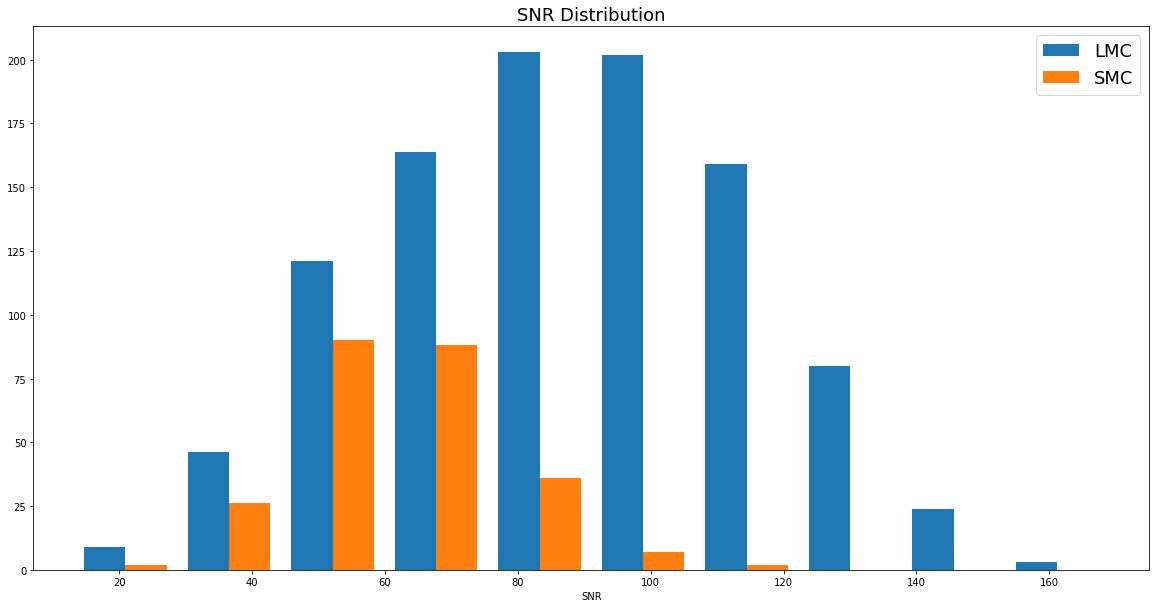

In [22]:
plt.figure(figsize = (20,10))
plt.hist([AllAvg_LMC_5['SNR'], AllAvg_SMC_5['SNR']], label = ['LMC', 'SMC'])
plt.title('SNR Distribution', size = 18)
plt.legend(prop = {'size': 18})
plt.xlabel("SNR")

Text(0.5,0,'VERR')

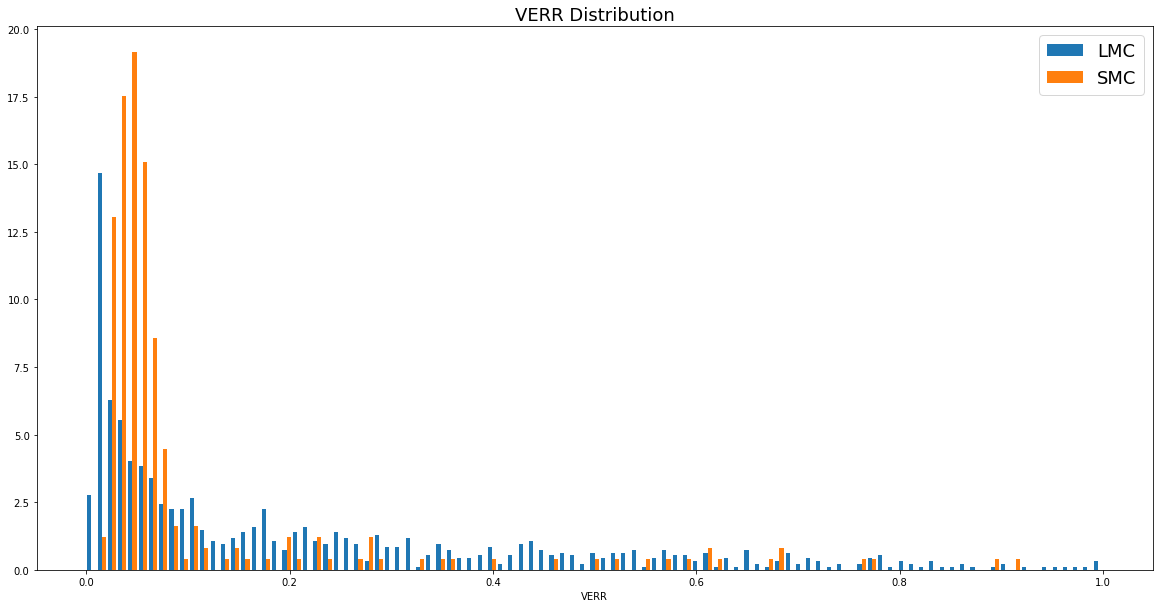

In [26]:
plt.figure(figsize = (20,10))
plt.hist([AllAvg_LMC_5['VERR'], AllAvg_SMC_5['VERR']], label = ['LMC', 'SMC'], bins = np.linspace(0,1, 100), density = True)
plt.title('VERR Distribution', size = 18)
plt.legend(prop = {'size': 18})
plt.xlabel("VERR")

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5),label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 100 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec = '0')

ax.set_title('SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)
plt.legend()
plt.show()

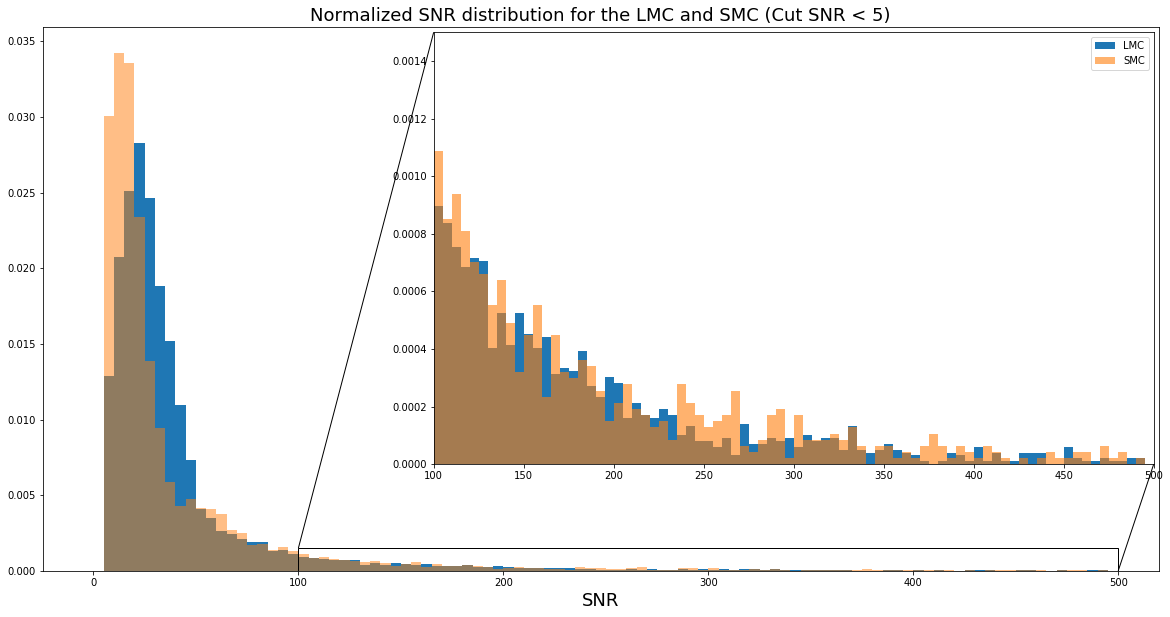

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC')
ax.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.5,density=True, label = 'SMC')
axins = inset_axes(ax, width = 10, height = 6, loc =1,) 
axins.hist(AllVis_LMC['SNR'],bins = np.arange(0,500,5), density= True,label='LMC',)
axins.hist(AllVis_SMC['SNR'],bins = np.arange(0,500,5), alpha = 0.6,density=True, label = 'SMC')
x1, x2, y1, y2 = 100, 500, 0, 0.0015 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")

ax.set_title('Normalized SNR distribution for the LMC and SMC (Cut SNR < 5)', size = 18)
ax.set_xlabel('SNR', size = 18)

plt.legend()
plt.show()

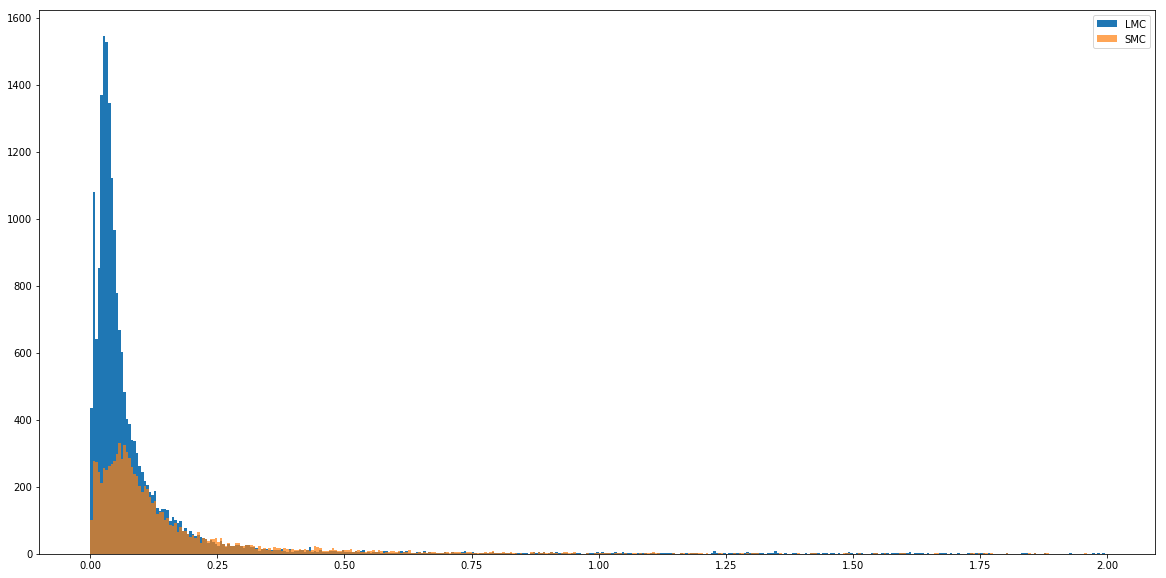

133
110


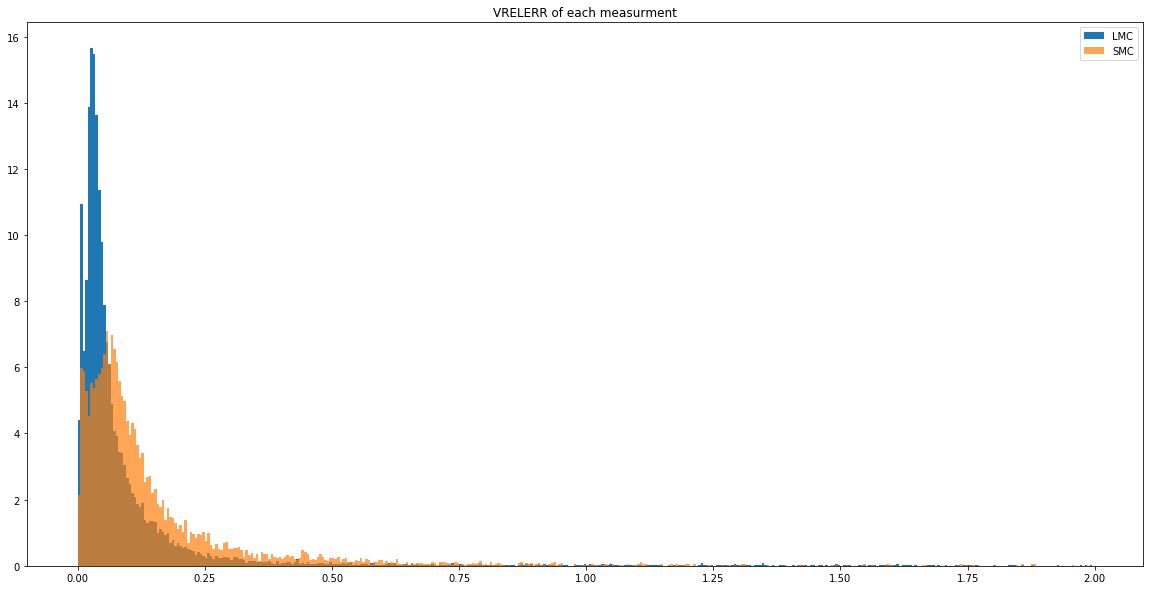

In [13]:
fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, label='SMC')
plt.legend()
plt.show()
print(len(AllVis_LMC[AllVis_LMC['VRELERR'] > 2]))
print(len(AllVis_SMC[AllVis_SMC['VRELERR'] > 2]))

fig, ax = plt.subplots(figsize = (20,10)) # create a new figure with a default 111 subplot
ax.hist(AllVis_LMC['VRELERR'],bins = np.arange(0,2,.005),density=True,label='LMC')
ax.hist(AllVis_SMC['VRELERR'],bins = np.arange(0,2,.005),alpha = 0.7, density=True, label='SMC')
plt.title('VRELERR of each measurment')
plt.legend()
plt.show()

In [17]:
my_nvisits_lmc = []
my_nvisits_smc = []
for n in AllAvg_LMC_5['RADIALV']:
    my_nvisits_lmc.append(len(n))
for n in AllAvg_SMC_5['RADIALV']:
    my_nvisits_smc.append(len(n))
my_nvisits_lmc

[49,
 90,
 90,
 49,
 79,
 90,
 90,
 90,
 49,
 90,
 49,
 90,
 90,
 90,
 49,
 80,
 80,
 90,
 49,
 89,
 90,
 49,
 90,
 80,
 90,
 89,
 90,
 88,
 89,
 90,
 49,
 90,
 89,
 90,
 89,
 90,
 49,
 89,
 90,
 90,
 90,
 90,
 90,
 89,
 90,
 49,
 49,
 90,
 90,
 49,
 49,
 90,
 90,
 89,
 49,
 49,
 49,
 49,
 80,
 49,
 49,
 88,
 90,
 90,
 49,
 89,
 89,
 90,
 80,
 90,
 49,
 49,
 90,
 49,
 49,
 90,
 49,
 89,
 90,
 90,
 90,
 89,
 90,
 88,
 90,
 90,
 90,
 90,
 49,
 90,
 89,
 90,
 90,
 90,
 90,
 90,
 90,
 49,
 49,
 89,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 89,
 80,
 39,
 90,
 90,
 89,
 90,
 49,
 49,
 90,
 90,
 49,
 89,
 89,
 49,
 49,
 90,
 49,
 90,
 49,
 90,
 89,
 90,
 90,
 49,
 49,
 49,
 49,
 90,
 49,
 90,
 90,
 49,
 89,
 49,
 90,
 49,
 89,
 90,
 90,
 49,
 90,
 89,
 90,
 90,
 49,
 90,
 90,
 90,
 90,
 49,
 90,
 80,
 90,
 49,
 90,
 89,
 90,
 79,
 90,
 90,
 49,
 49,
 49,
 59,
 49,
 49,
 59,
 59,
 59,
 49,
 59,
 49,
 49,
 49,
 49,
 59,
 49,
 49,
 59,
 59,
 49,
 49,
 59,
 49,
 59,
 49,
 59,
 49,
 49,
 49,
 59,
 59,


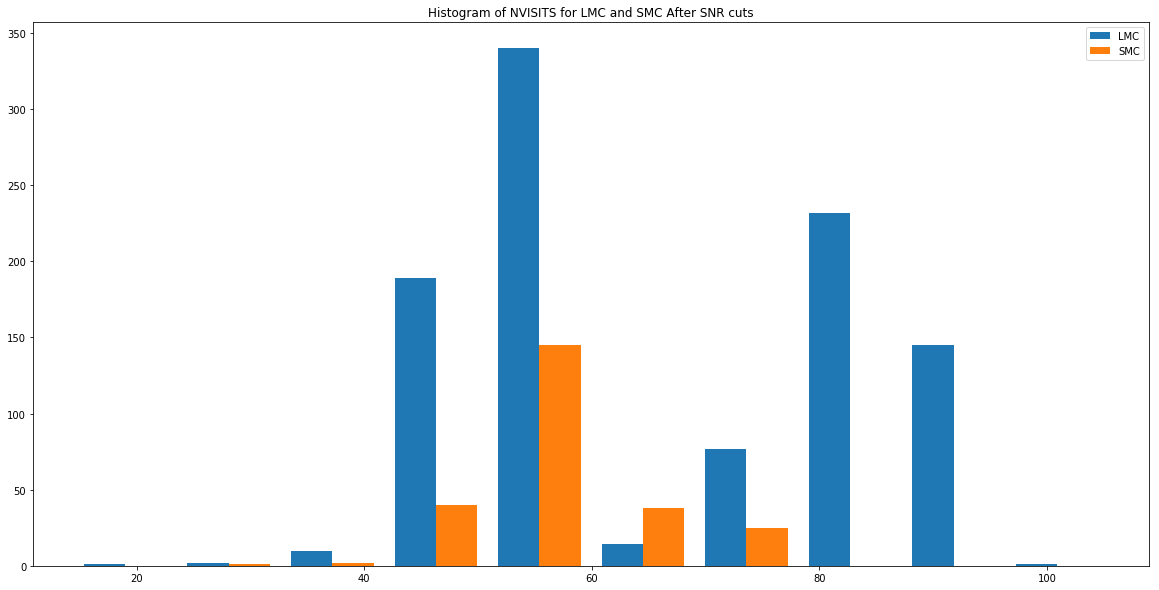

In [18]:
plt.figure(figsize = (20,10))
plt.title('Histogram of NVISITS for LMC and SMC After SNR cuts')
#plt.hist(my_nvisits_lmc, bins = range(4,12), rwidth=0.5,
#         align = 'left', label = 'LMC', stacked = False)
#plt.hist(my_nvisits_smc, bins = range(4,12), rwidth=0.5,
#         align = 'left', alpha = 0.7, label = 'SMC',stacked = False)
plt.hist([my_nvisits_lmc, my_nvisits_smc], label = ['LMC', 'SMC'], align = 'left')
plt.legend()
plt.show()

In [18]:
%run Table_Convert.py
AllAvg_SMC_5=Table_Convert(AllAvg_SMC_5)
AllAvg_LMC_5=Table_Convert(AllAvg_LMC_5)

%run Binary_Fraction.py
thing_LMC_5 = Binary_Fraction(AllAvg_LMC_5)
thing_SMC_5 = Binary_Fraction(AllAvg_SMC_5)
real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC = thing_LMC_5.Real_Data_Fraction()
real_data_detection_SMC_5, binary_bool_SMC_5, SMC_binary_detection_5,rd_err_SMC = thing_SMC_5.Real_Data_Fraction()

In [19]:
epoch_spanLMC = []
for n in range(len(AllAvg_LMC_5[binary_bool_LMC_5])):
    foo = AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][-1] - AllAvg_LMC_5[binary_bool_LMC_5]['RADIAL_DATE'][n][0]
    epoch_spanLMC.append(foo)

epoch_spanLMC_all = []
for n in range(len(AllAvg_LMC_5)):
    foo = AllAvg_LMC_5['RADIAL_DATE'][n][-1] - AllAvg_LMC_5['RADIAL_DATE'][n][0]
    epoch_spanLMC_all.append(foo)
epoch_spanSMC = []
for n in range(len(AllAvg_SMC_5[binary_bool_SMC_5])):
    foo = AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][-1] - AllAvg_SMC_5[binary_bool_SMC_5]['RADIAL_DATE'][n][0]
    epoch_spanSMC.append(foo)

epoch_spanSMC_all = []
for n in range(len(AllAvg_SMC_5)):
    foo = AllAvg_SMC_5['RADIAL_DATE'][n][-1] - AllAvg_SMC_5['RADIAL_DATE'][n][0]
    epoch_spanSMC_all.append(foo)

Graph below is a histogram of the total span in epochs.

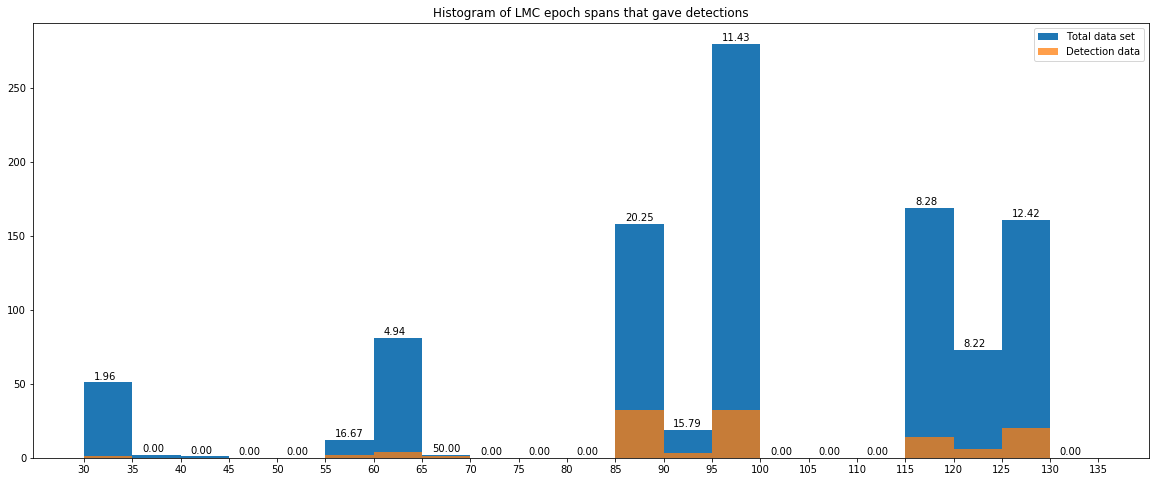

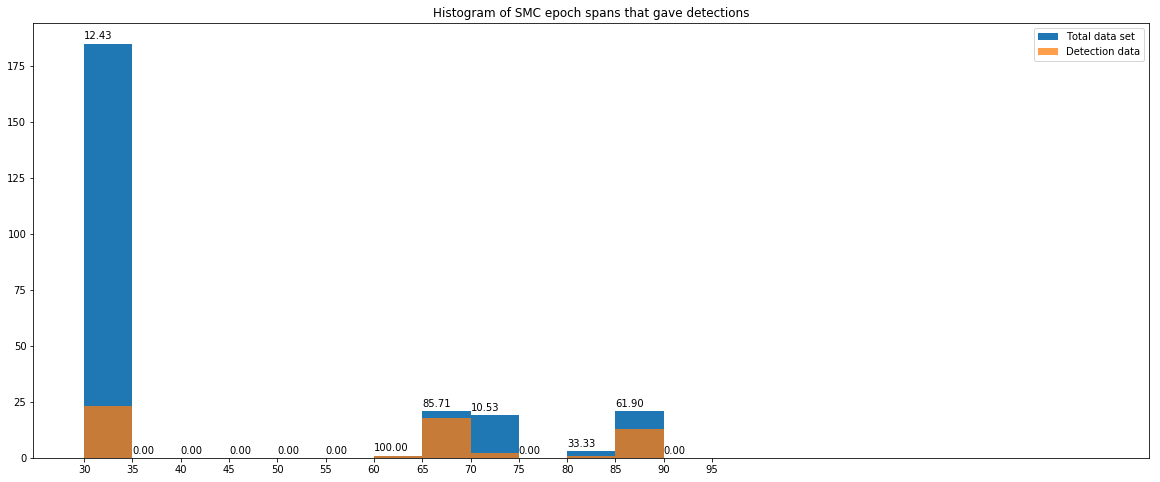

In [20]:
plt.figure(figsize = (20,8))
plt.title('Histogram of LMC epoch spans that gave detections')
x1 = plt.hist(epoch_spanLMC_all, bins = np.arange(30,140,5), label = 'Total data set')
y1 = plt.hist(epoch_spanLMC,bins = np.arange(30,140,5), alpha = 0.75,label = 'Detection data')
plt.xticks(np.arange(30,140,5))
for i in range(len(np.arange(30,140,5))-1):
    percent = "{0:.2f}".format(y1[0][i]/(x1[0][i]+1e-15)*100)
    plt.text(x1[1][i]+1,x1[0][i]+2,percent)
plt.legend()
plt.show()

plt.figure(figsize = (20,8))
plt.title('Histogram of SMC epoch spans that gave detections')
x2 = plt.hist(epoch_spanSMC_all, bins = np.arange(30,100,5), label = 'Total data set')
y2 = plt.hist(epoch_spanSMC,bins = np.arange(30,140,5), alpha = 0.75, label = 'Detection data')
for i in range(len(np.arange(30,100,5))-1):
    percent = "{0:.2f}".format(y2[0][i]/(x2[0][i]+1e-15)*100)
    plt.text(x2[1][i],x2[0][i]+2,percent)
plt.xticks(np.arange(30,100,5))
plt.legend()
plt.show()

Next is a similar plot to the above one but this time we look at the metalicity distribution for the total data set and the detection data. 

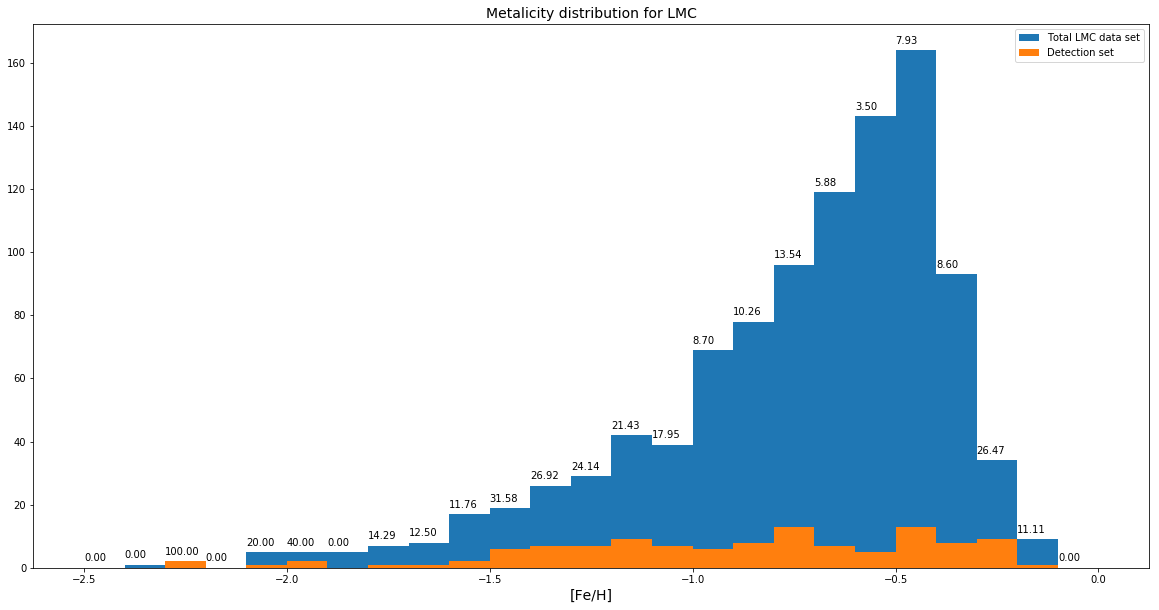

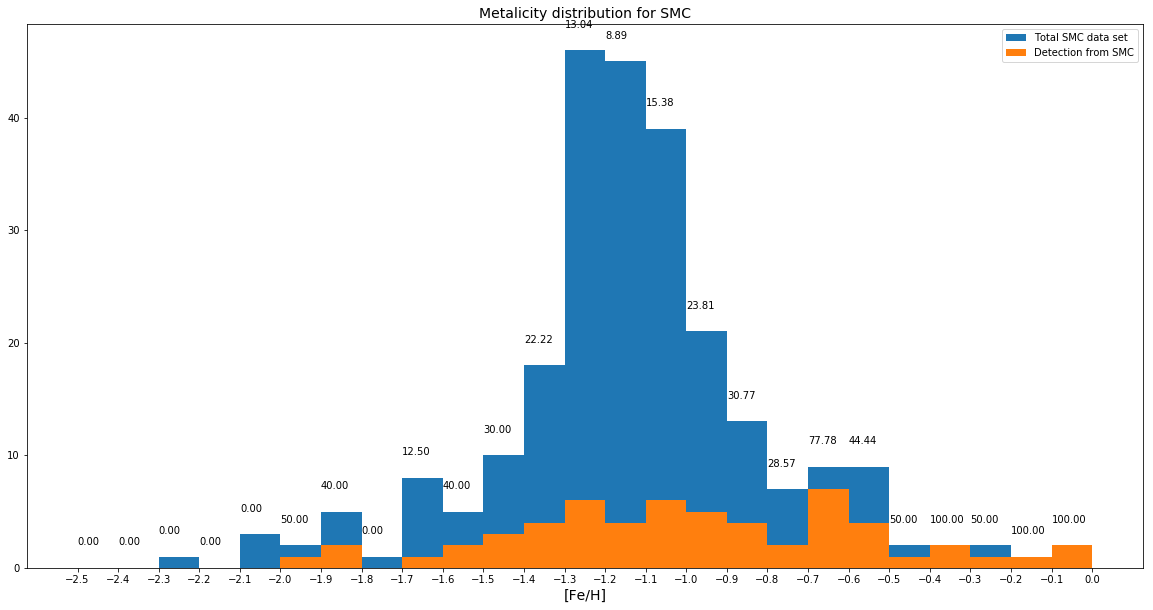

In [21]:
plt.figure(figsize=(20,10))
x = plt.hist(AllAvg_LMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total LMC data set')
y = plt.hist(AllAvg_LMC_5[binary_bool_LMC_5]['FE_H'],bins = np.arange(-2.5,0.1,0.1), label = 'Detection set')
plt.legend()
plt.title('Metalicity distribution for LMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
foo_list = []
for i in range(len(np.arange(-2.5,0.1,0.1))-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize=(20,10))
x = plt.hist(AllAvg_SMC_5['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Total SMC data set')
y = plt.hist(AllAvg_SMC_5[binary_bool_SMC_5]['FE_H'], bins = np.arange(-2.5,0.1,0.1), label = 'Detection from SMC')
plt.xticks(np.arange(-2.5,0.1,0.1))
foo_list2 = []
for i in range(len(np.arange(-2.5,0.1,0.1))-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list2.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.legend()
plt.title('Metalicity distribution for SMC', size = 14)
plt.xlabel('[Fe/H]', size = 14)
plt.show()

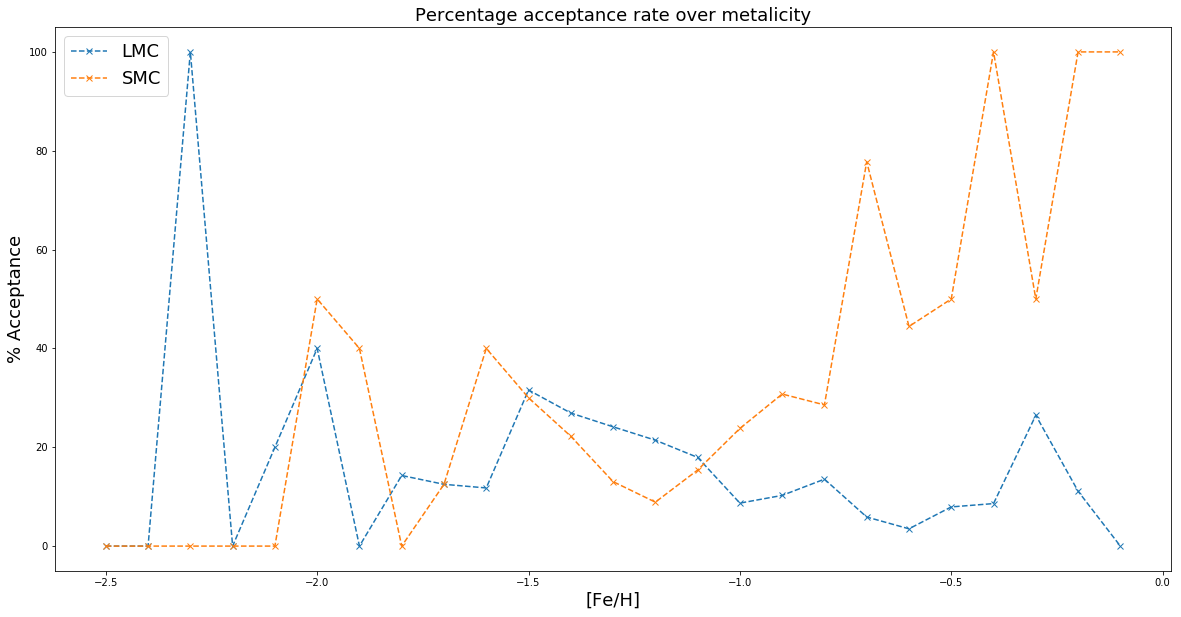

In [22]:
plt.figure(figsize = (20,10))
plt.plot(x[1][:-1],foo_list,'x--', label =  'LMC')
plt.plot(x[1][:-1],foo_list2,'x--', label = 'SMC')
plt.title('Percentage acceptance rate over metalicity', size = 18)
plt.ylabel('% Acceptance', size = 18)
plt.xlabel('[Fe/H]', size = 18)
plt.legend(prop = {'size': 18})
plt.show()

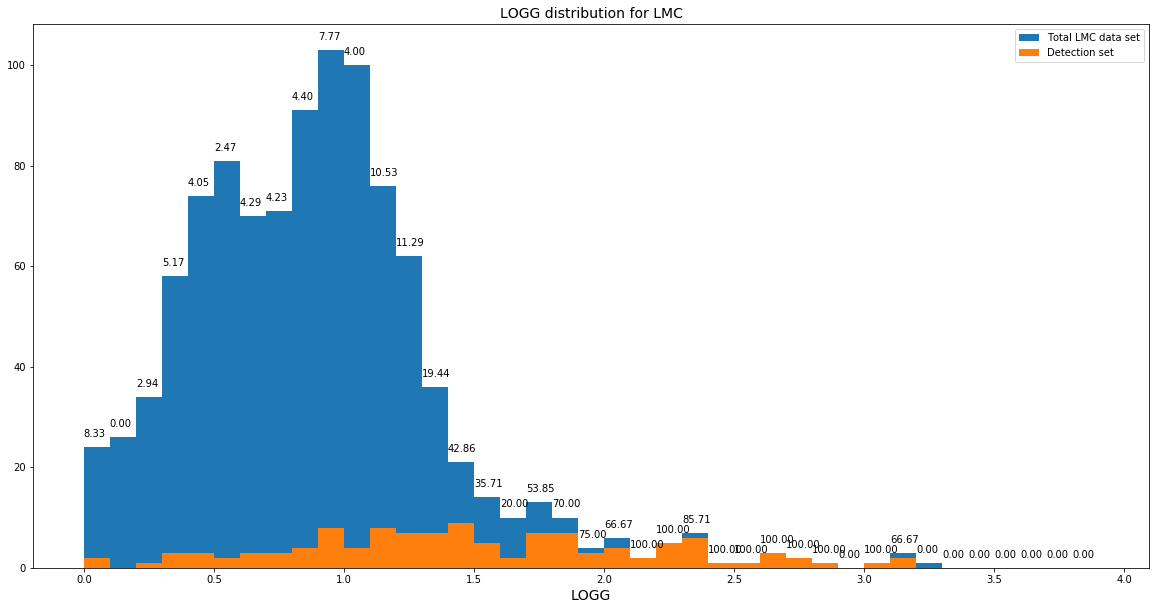

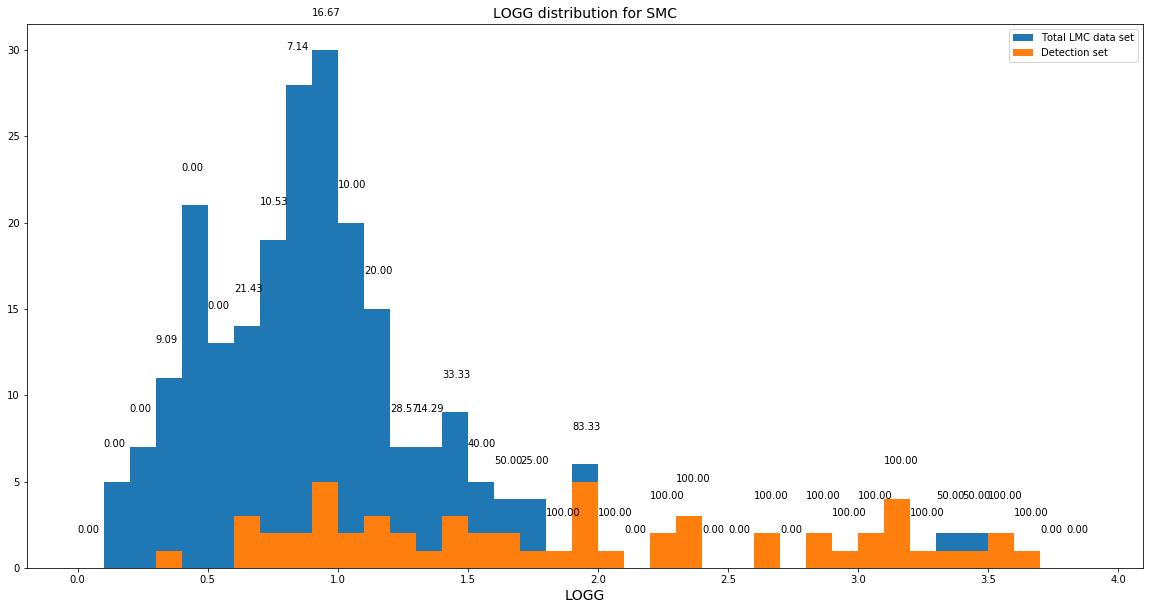

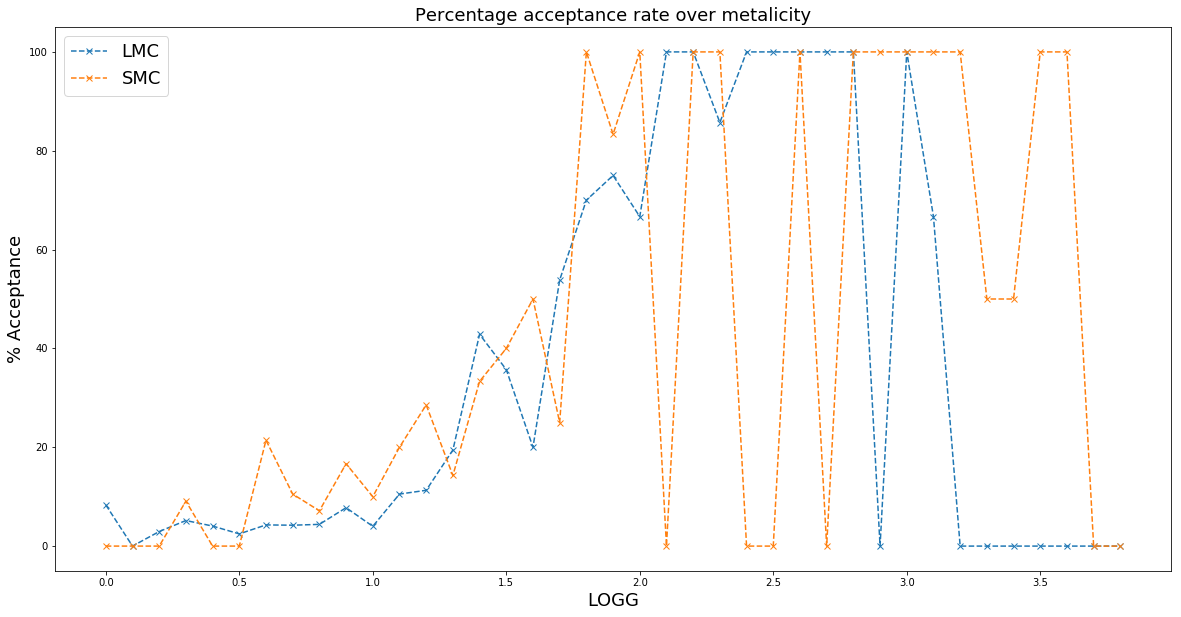

In [23]:
plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
x = plt.hist(AllAvg_LMC_5['LOGG'],bins = bins, label = 'Total LMC data set')
y = plt.hist(AllAvg_LMC_5[binary_bool_LMC_5]['LOGG'],bins = bins, label = 'Detection set')
plt.legend()
plt.title('LOGG distribution for LMC', size = 14)
plt.xlabel('LOGG', size = 14)
foo_list = []
for i in range(len(bins)-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
x = plt.hist(AllAvg_SMC_5['LOGG'],bins = bins, label = 'Total LMC data set')
y = plt.hist(AllAvg_SMC_5[binary_bool_SMC_5]['LOGG'],bins = bins, label = 'Detection set')
plt.legend()
plt.title('LOGG distribution for SMC', size = 14)
plt.xlabel('LOGG', size = 14)
foo_list2 = []
for i in range(len(bins)-1):
    percent = "{0:.2f}".format(y[0][i]/(x[0][i]+1e-15)*100)
    plt.text(x[1][i],x[0][i]+2,percent)
    foo_list2.append(y[0][i]/(x[0][i]+1e-15)*100)
plt.show()

plt.figure(figsize = (20,10))
plt.plot(x[1][:-1],foo_list,'x--', label =  'LMC')
plt.plot(x[1][:-1],foo_list2,'x--', label = 'SMC')
plt.title('Percentage acceptance rate over metalicity', size = 18)
plt.ylabel('% Acceptance', size = 18)
plt.xlabel('LOGG', size = 18)
plt.legend(prop = {'size': 18})
plt.show()

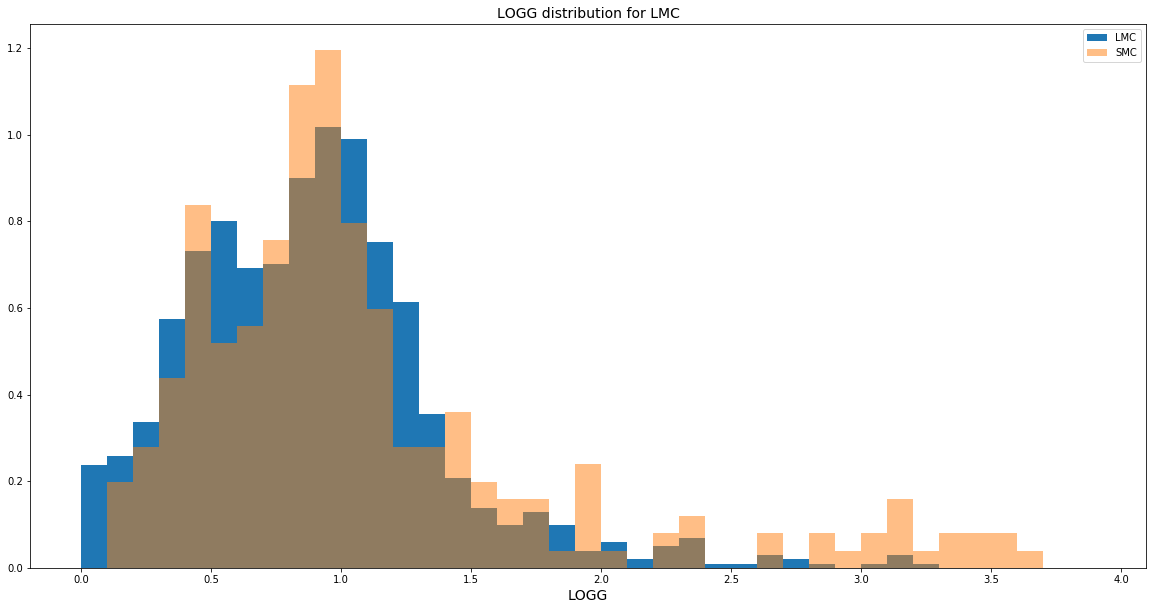

In [24]:
plt.figure(figsize=(20,10))
bins = np.arange(0, 4, 0.1)
plt.hist(AllAvg_LMC_5['LOGG'],bins = bins, label = 'LMC', density=True)
plt.hist(AllAvg_SMC_5['LOGG'],bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('LOGG distribution for LMC', size = 14)
plt.xlabel('LOGG', size = 14)
plt.show()

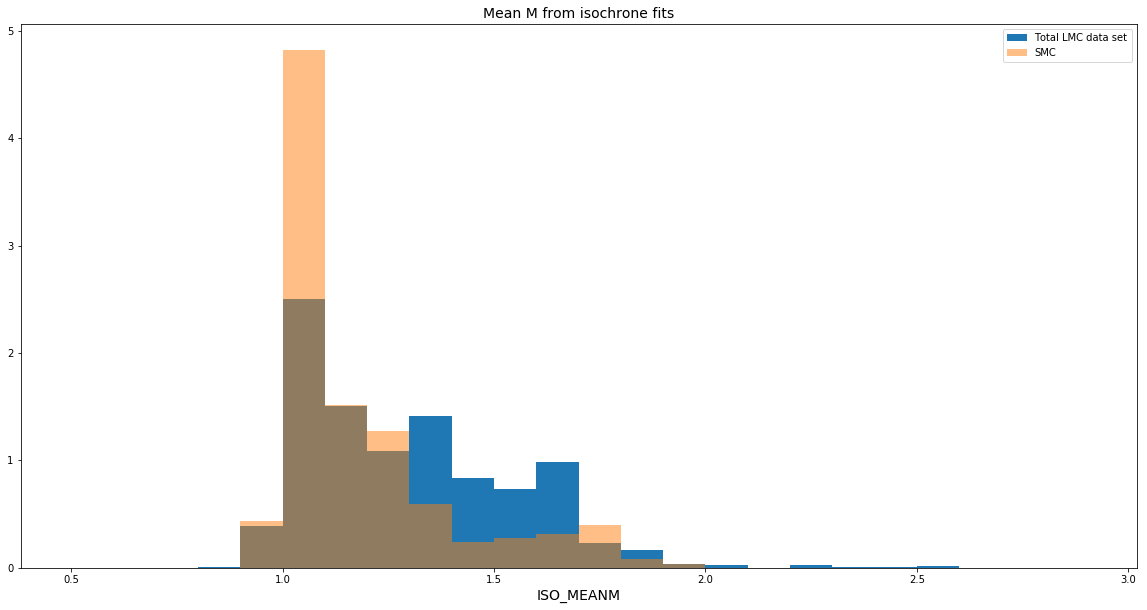

In [25]:
plt.figure(figsize=(20,10))
bins = np.arange(0.5, 3, 0.1)
plt.hist(AllAvg_LMC_5['ISO_MEANM'],bins = bins, label = 'Total LMC data set', density=True)
plt.hist(AllAvg_SMC_5['ISO_MEANM'],bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('Mean M from isochrone fits', size = 14)
plt.xlabel('ISO_MEANM', size = 14)
plt.show()

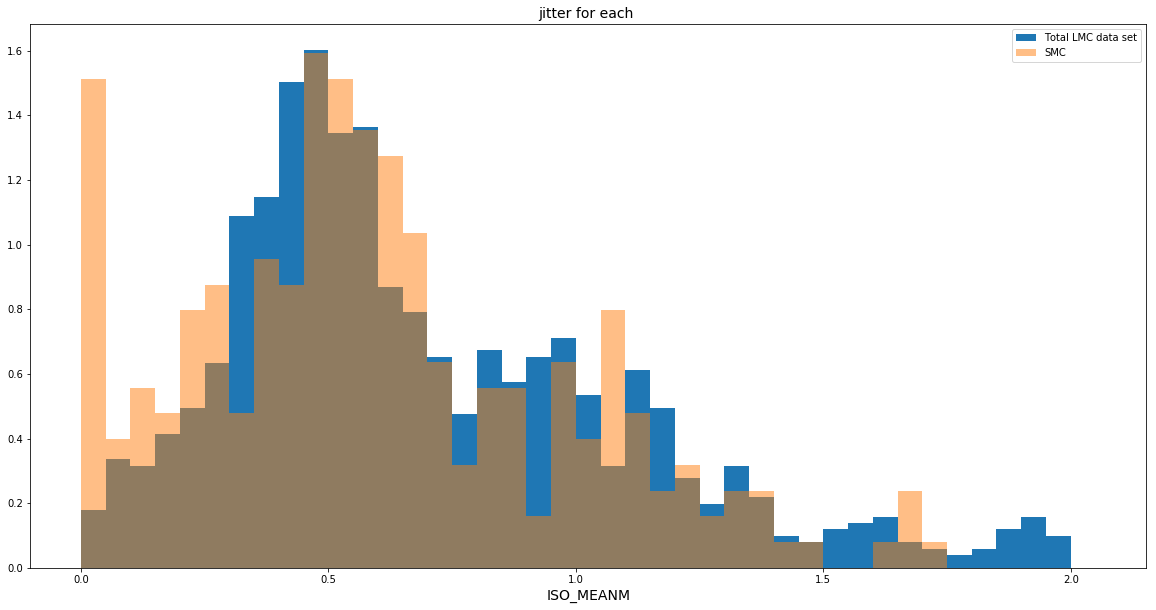

In [26]:
LMC_jitter = 2*0.015**(AllAvg_LMC_5['LOGG']/3)
SMC_jitter = 2*0.015**(AllAvg_SMC_5['LOGG']/3)
plt.figure(figsize=(20,10))
bins = np.arange(0, 2.1, 0.05)
plt.hist(LMC_jitter,bins = bins, label = 'Total LMC data set', density=True)
plt.hist(SMC_jitter,bins = bins, label = 'SMC', density=True, alpha = 0.5)
plt.legend()
plt.title('jitter for each ', size = 14)
plt.xlabel('ISO_MEANM', size = 14)
plt.show()

In [27]:
min(AllVis_LMC['SNR'])

5.00236

In [ ]:
min(AllVis_LMC_SNR['SNR'])

In [ ]:
    import os
    os.environ['PATH']